Github Link: https://github.com/ichi206/EE399/tree/main/HW2

In [4]:
#Import Block
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat

results = loadmat('yalefaces.mat')
X = results['X']

In [5]:
print(np.shape(X)) #vars by faces

(1024, 2414)


(100, 100)


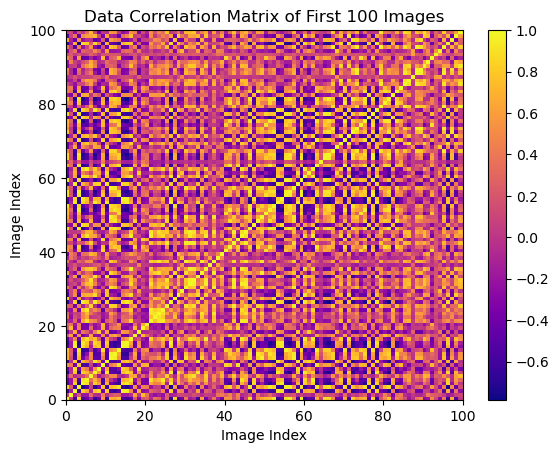

In [9]:
# A make 100x100 correlation matrix

Xbar = 1/(len(X) * len(X[0]) * np.sum(X[:,:]))
Xnorm = X - Xbar

sub_mat = X[:, :100]
C = np.corrcoef(sub_mat.T) # covariance matrix/(std dev row * std dev col)
avgCorr = np.mean(C, axis=1)

print(C.shape)
plt.pcolor(C, cmap='plasma')
plt.colorbar()
plt.title('Data Correlation Matrix of First 100 Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

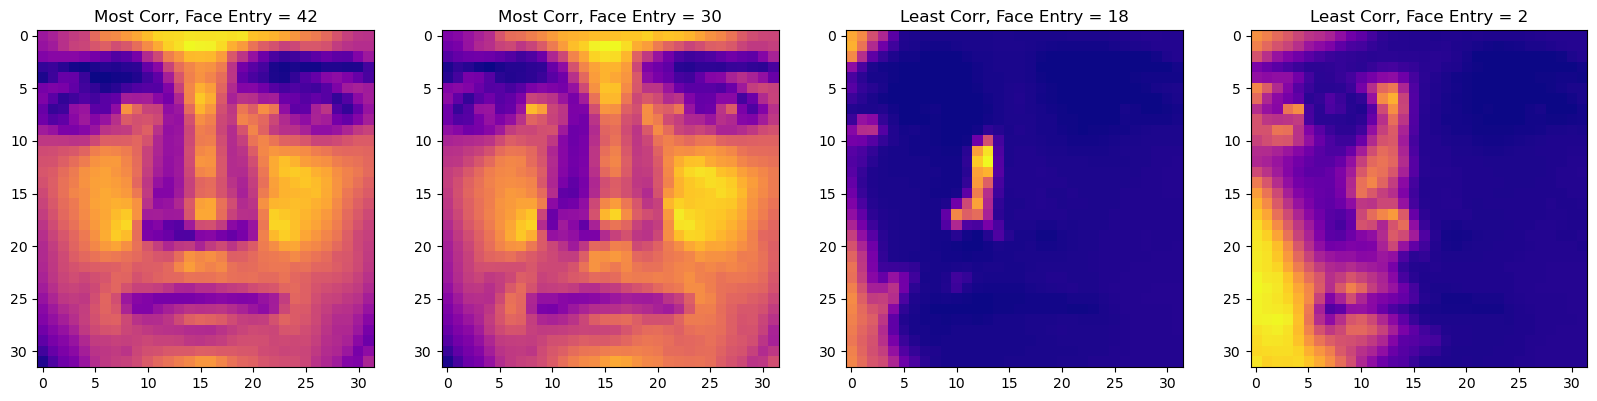

In [11]:
# B Find the most and least correlated faces
mostCorr = np.argsort(avgCorr)[::-1]
leastCorr = np.argsort(avgCorr)

fig, ax = plt.subplots(1, 4, figsize=(20, 15))
for i in range(0,2):
  ax[i].imshow(X[:,mostCorr[i]].reshape((32,32)), cmap = 'plasma')
  ax[i].set_title("Most Corr, Face Entry = " + str(mostCorr[i]))

for i in range(2,4):
  ax[i].imshow(X[:,leastCorr[i]].reshape((32,32)), cmap = 'plasma')
  ax[i].set_title("Least Corr, Face Entry = " + str(leastCorr[i]))

(100, 100)


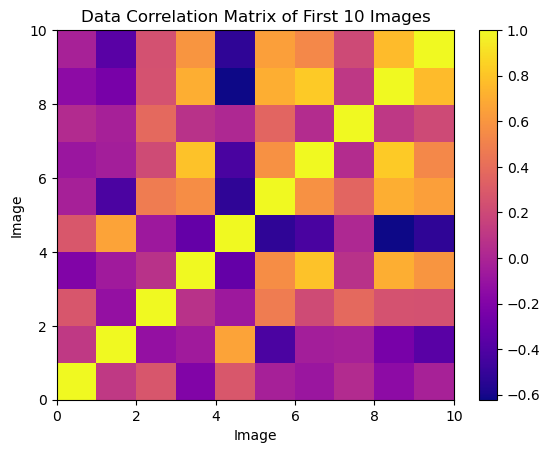

In [19]:
# C do a 10x10 correlation matrix and plot it
img = [1,313,512,5,2400,113,1024,87,314,2005]
sub_mat1 = Xnorm[:, img]
C1 = np.corrcoef(sub_mat1.T) # covariance matrix/(std dev row * std dev col)
print(C.shape)
plt.pcolor(C1, cmap='plasma')
plt.colorbar()
plt.title('Data Correlation Matrix of First 10 Images')
plt.xlabel('Image')
plt.ylabel('Image')
plt.show()

In [13]:
# D Create Y = X*X^T and find the 6 eigenvectors with the 6 largest eigenvalues
Y = X.dot(X.T)

eigenVals, eigenVects = np.linalg.eigh(Y)
eigenVals = eigenVals[::-1]
eigenVects = eigenVects[:, ::-1]

print("Eigenvalues: " + str(eigenVals[:6]))
print("Eigenvectors: " + str(eigenVects[:, :6]))

Eigenvalues: [234020.45485389  49038.31530059   8236.53989701   6024.87145793
   2051.49643269   1901.07911482]
Eigenvectors: [[-0.02384327  0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146  0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448  0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937 -0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902  -0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019  -0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


In [14]:
# E SVD the matrix X

Vect, s, Vt = np.linalg.svd(X)
print("Principal Directions: " + str(Vect[:,:6]))

Principal Directions: [[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]]


In [17]:
# F Compare the first eigenvector to the first SVD mode and compute the norm diff in absolute values
diff = np.abs(np.linalg.norm((eigenVects[:,0])-(Vect[:,0])))
print("Abs Diff of First Eigenvector and SVD Mode: " + str(diff))

Abs Diff of First Eigenvector and SVD Mode: 5.300112533867266e-16


SVD Mode 0 with error %: 72.9275674690956
SVD Mode 1 with error %: 15.281762655694376
SVD Mode 2 with error %: 2.5667449429852724
SVD Mode 3 with error %: 1.8775248514714757
SVD Mode 4 with error %: 0.6393058444446524
SVD Mode 5 with error %: 0.5924314415034935


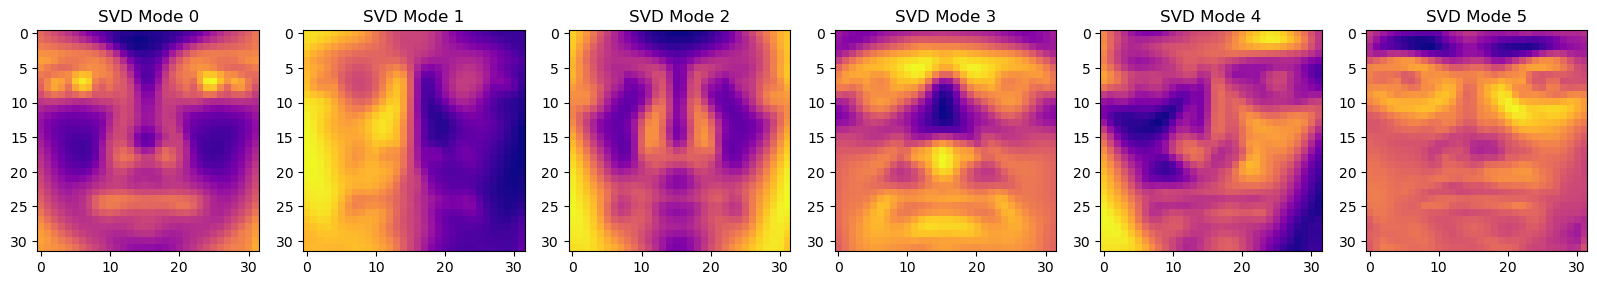

In [18]:
# G Compute the percentage variance by each of the first 6 SVD modes and plot the modes
fig, ax = plt.subplots(1, 6, figsize=(20, 15))

for i in range(0,6):
    percVar = (s[i]**2) / (np.sum(s**2)) * 100
    print("SVD Mode " + str(i) + " with error %: " + str(percVar))

    ax[i].imshow(Vect[:,i].reshape((32,32)), cmap = 'plasma')
    ax[i].set_title("SVD Mode " + str(i))